# Problem Definition:

IBM HR Analytics Employee Attrition & Performance(factors responsible for it).

# Author: Samiksha Adsule

# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import sklearn 
import scipy
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

C:\Users\my lappy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\my lappy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Reading dataset

In [2]:
df=pd.read_excel("IBM_Attrition.xlsx")

# Displaying all the rows and columns 

In [3]:
#pd.set_option('display.max_rows',1500)
pd.set_option('display.max_columns',1500)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Checking total no. rows and no.of columns 

In [4]:
df.shape

(1470, 35)

# Data Preprocessing and EDA 

# Checking datatypes of all the columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Dividing the columns into 2 categories (Continuous and categorical)

In [6]:
cat=[]
con=[]
for i in df.columns:
    if df[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [7]:
cat_df=df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18',
           'OverTime']]

In [8]:
con_df=df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
         'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
         'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
         'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
         'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

# 3 coulmns are removed as they have constant values and as of no use in the dataset further  'EmployeeCount', 
#'EmployeeNumber', 'StandardHours',

## Checking if there are any null values 

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Hence,we can see there are no null values in the dataset as value is 0. 

 ## Summary of the whole Dataset

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


 Hence from the summary it is seen that some of the columns are not normalised in curve as their mean != median.
 Those are as follows:--

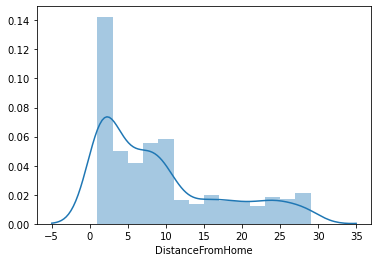

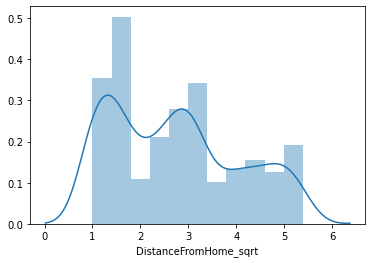

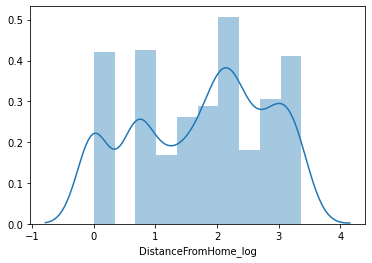

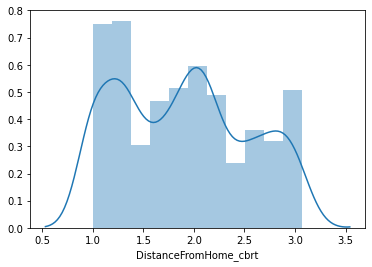

In [11]:
# 1) DistanceFromHome

sb.distplot(df.DistanceFromHome)
plt.show()

df['DistanceFromHome_sqrt']=np.sqrt(df.DistanceFromHome)
sb.distplot(df.DistanceFromHome_sqrt)
plt.show()

df['DistanceFromHome_log']=np.log(df.DistanceFromHome)
sb.distplot(df.DistanceFromHome_log)
plt.show()

df['DistanceFromHome_cbrt']=np.cbrt(df.DistanceFromHome)
sb.distplot(df.DistanceFromHome_cbrt)
plt.show()

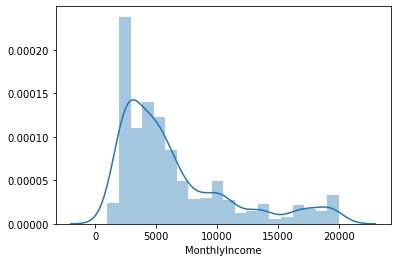

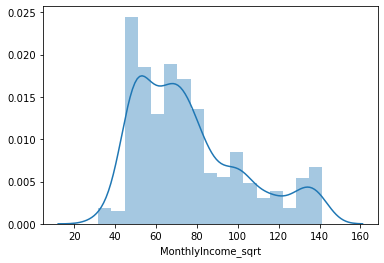

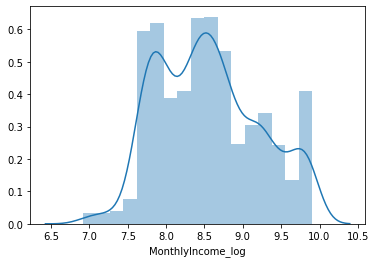

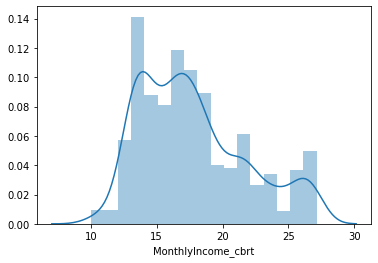

In [12]:
# 2) MonthlyIncome

sb.distplot(df.MonthlyIncome)
plt.show()

df['MonthlyIncome_sqrt']=np.sqrt(df.MonthlyIncome)
sb.distplot(df.MonthlyIncome_sqrt)
plt.show()

df['MonthlyIncome_log']=np.log(df.MonthlyIncome)
sb.distplot(df.MonthlyIncome_log)
plt.show()

df['MonthlyIncome_cbrt']=np.cbrt(df.MonthlyIncome)
sb.distplot(df.MonthlyIncome_cbrt)
plt.show()

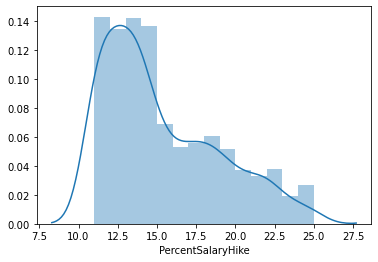

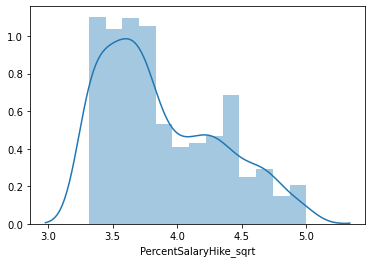

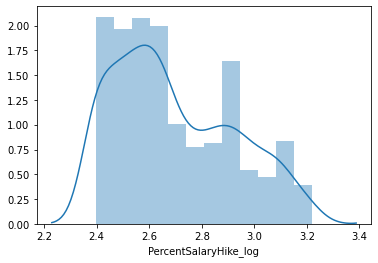

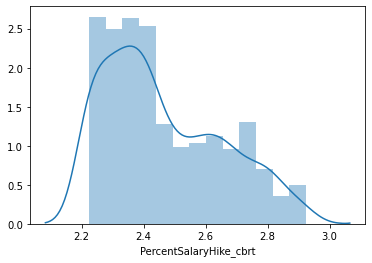

In [13]:
# 3) PercentSalaryHike

sb.distplot(df.PercentSalaryHike)
plt.show()

df['PercentSalaryHike_sqrt']=np.sqrt(df.PercentSalaryHike)
sb.distplot(df.PercentSalaryHike_sqrt)
plt.show()

df['PercentSalaryHike_log']=np.log(df.PercentSalaryHike)
sb.distplot(df.PercentSalaryHike_log)
plt.show()

df['PercentSalaryHike_cbrt']=np.cbrt(df.PercentSalaryHike)
sb.distplot(df.PercentSalaryHike_cbrt)
plt.show()

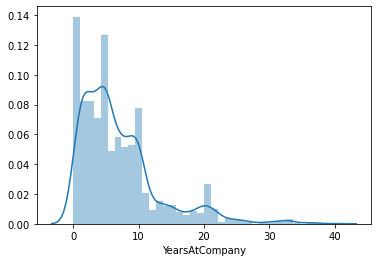

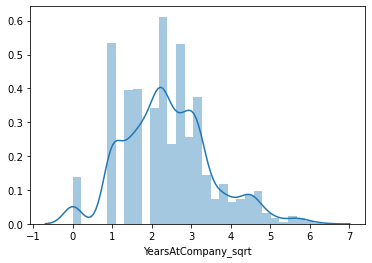

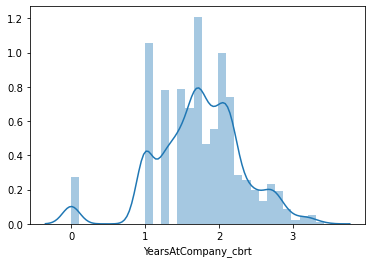

In [14]:
# 4) YearsAtCompany

sb.distplot(df.YearsAtCompany)
plt.show()

df['YearsAtCompany_sqrt']=np.sqrt(df.YearsAtCompany)
sb.distplot(df.YearsAtCompany_sqrt)
plt.show()


df['YearsAtCompany_cbrt']=np.cbrt(df.YearsAtCompany)
sb.distplot(df.YearsAtCompany_cbrt)
plt.show()


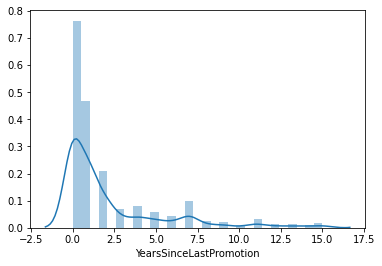

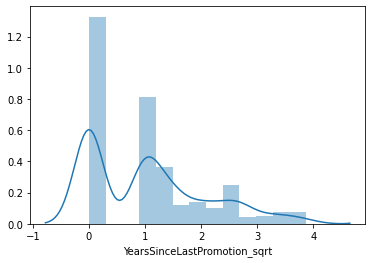

In [15]:
# 5) YearsSinceLastPromotion


sb.distplot(df.YearsSinceLastPromotion)
plt.show()

df['YearsSinceLastPromotion_sqrt']=np.sqrt(df.YearsSinceLastPromotion)
sb.distplot(df.YearsSinceLastPromotion_sqrt)
plt.show()


# Checking correlation through Heatmap

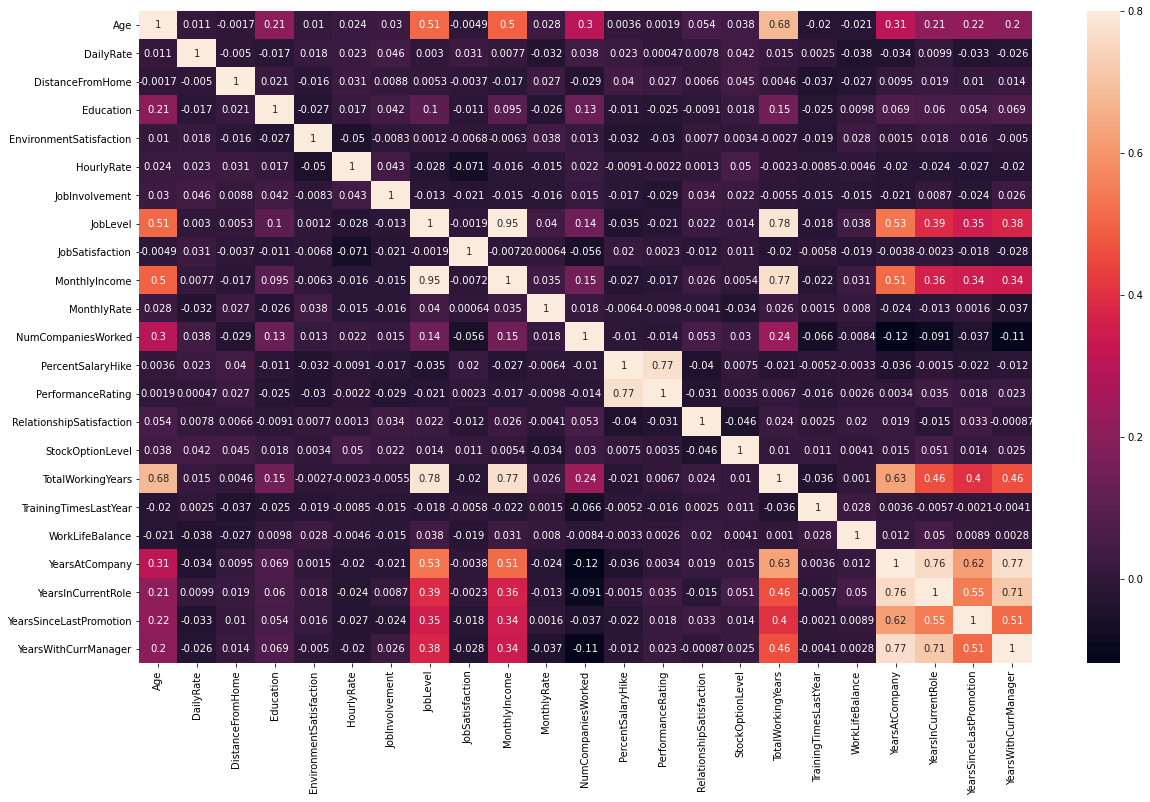

In [16]:
corr_heatmap = con_df.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_heatmap,vmax=0.8, annot=True)

No such information is gained through heatmap as it has too many columns and it is difficult to retrieve any conclusion.
So other graphs has been plot to take out Insights..

In [17]:
#Show how much % of employees left the organization is as follows:-

df.Attrition.value_counts(normalize=True)

#16 % of the employees left the company. 84% did not leave the company.(Class Imbalance Problem)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

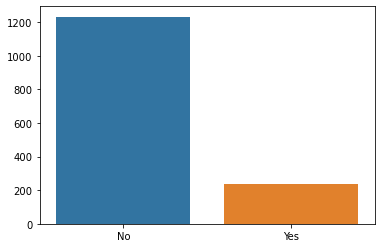

In [18]:
Attrition=df.Attrition.value_counts()
sb.barplot(x=Attrition.index,y=Attrition.values)

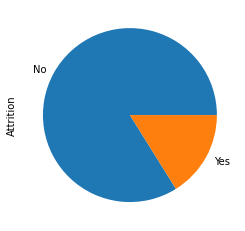

In [19]:
df['Attrition'].value_counts().plot(kind="pie")

This cleary shows that no. of "NO" records is 84% and no. of "Yes" records is 16%. 
This means data is imbalanced .This is class Imbalanced Problem. 

In [20]:
df.OverTime.value_counts(normalize=True)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

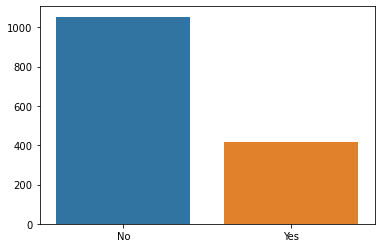

In [21]:
OverTime=df.OverTime.value_counts()
sb.barplot(x=OverTime.index,y=OverTime.values)

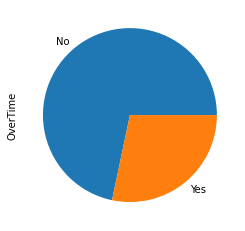

In [22]:
df['OverTime'].value_counts().plot(kind="pie")

# KDE Plot (KERNAL DENSITY PLOT)

In [23]:
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sb.kdeplot(df.loc[(df['Attrition'] == 'No'),var] , color='b',shade=True, label='no Attrition') 
    ax=sb.kdeplot(df.loc[(df['Attrition'] == 'Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

In [24]:
con_df=df.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(con_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)

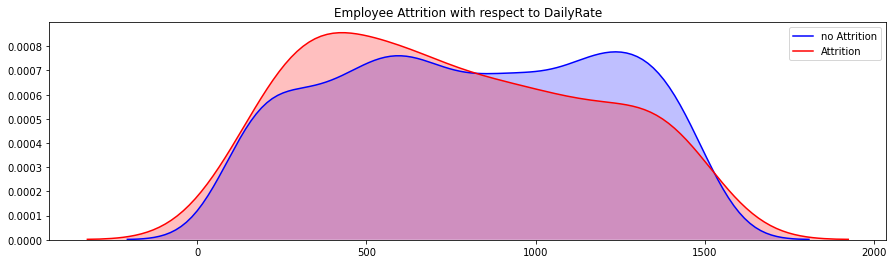

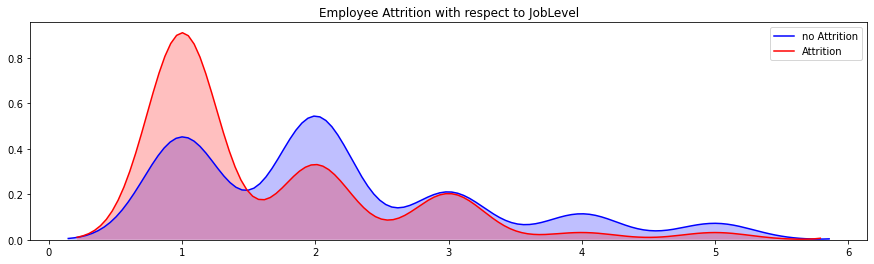

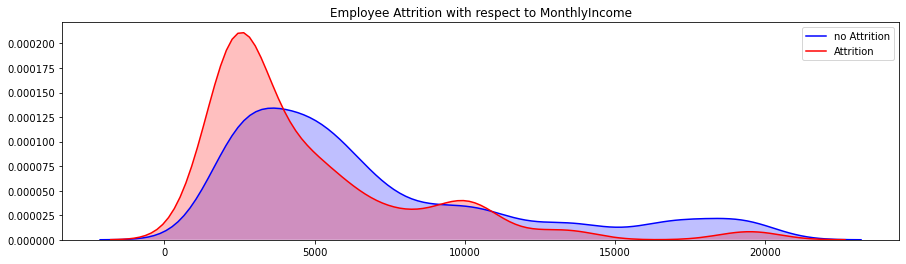

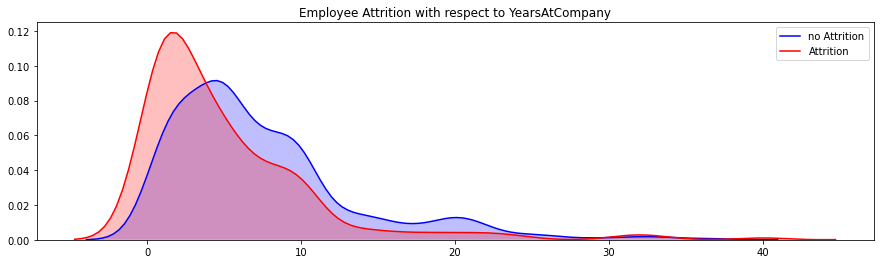

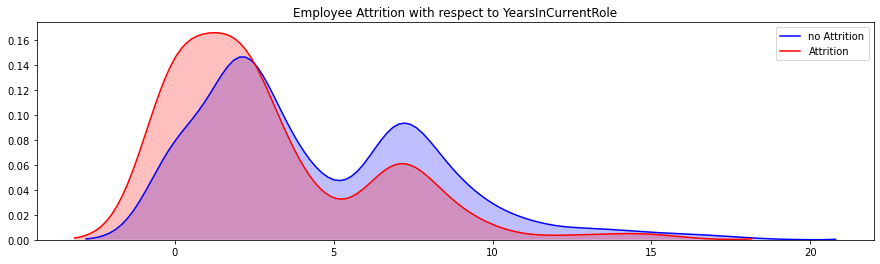

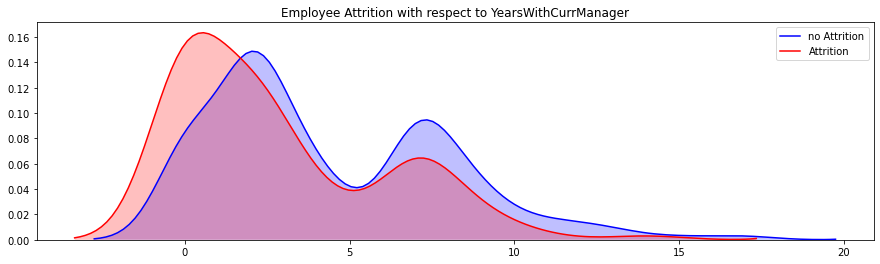

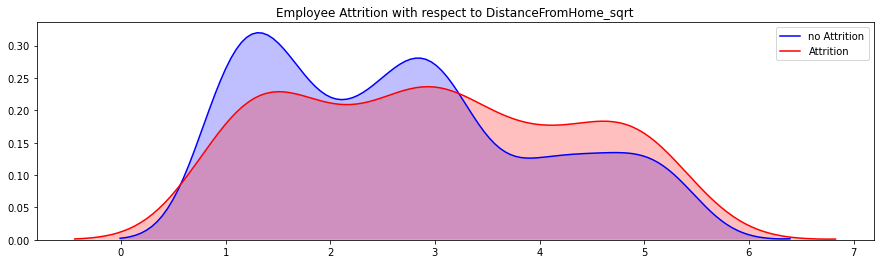

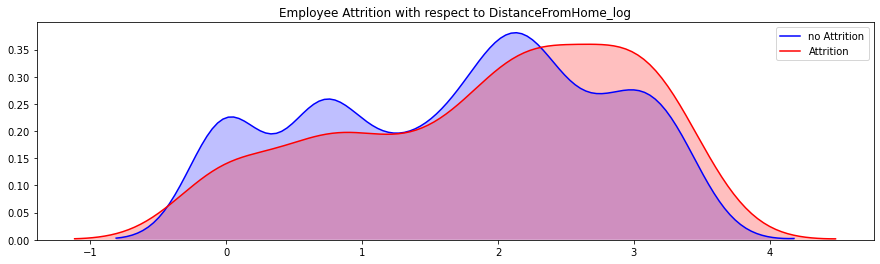

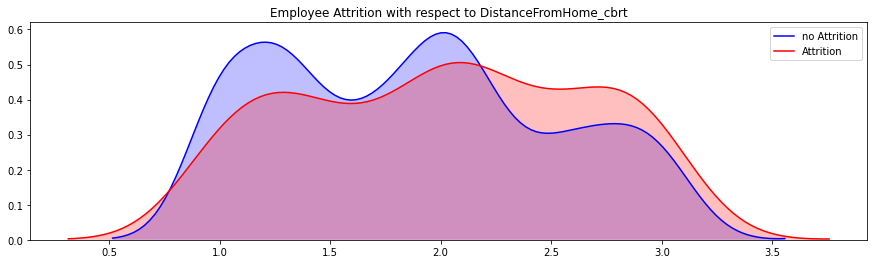

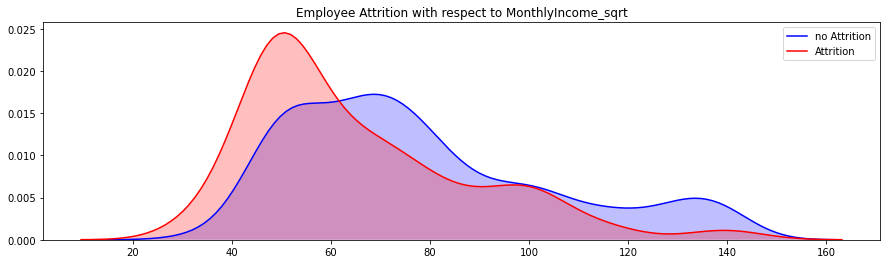

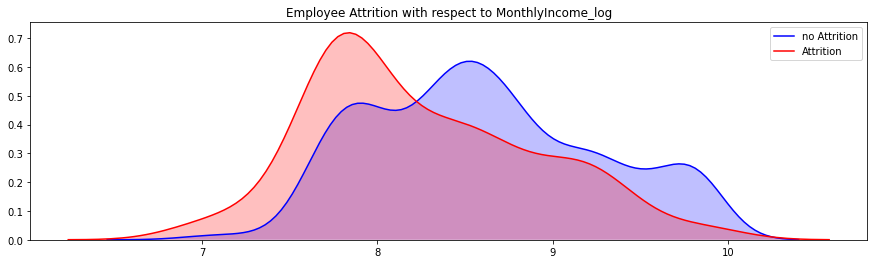

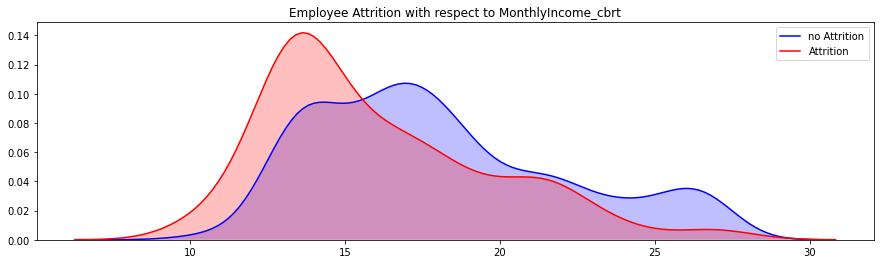

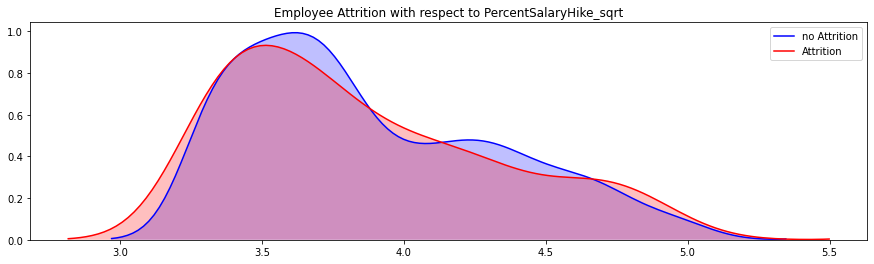

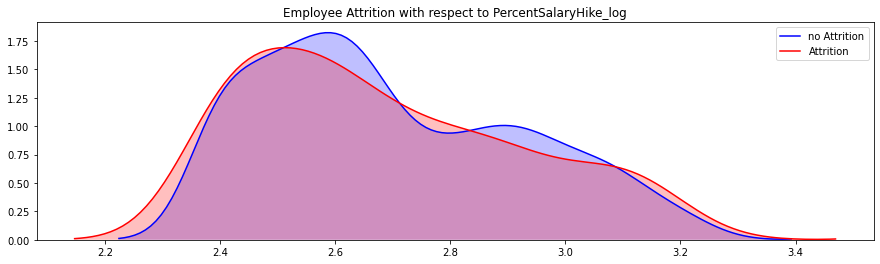

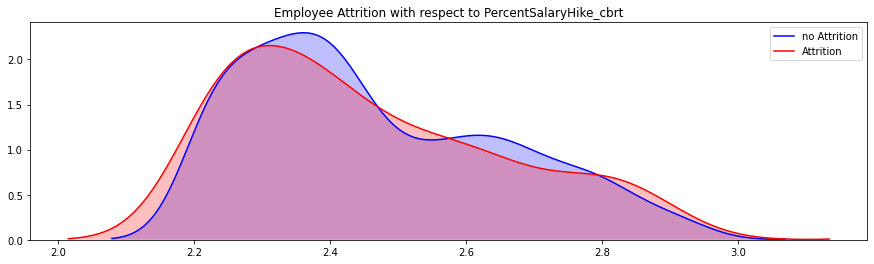

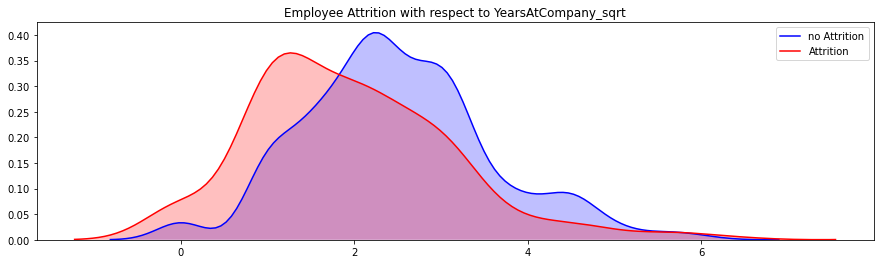

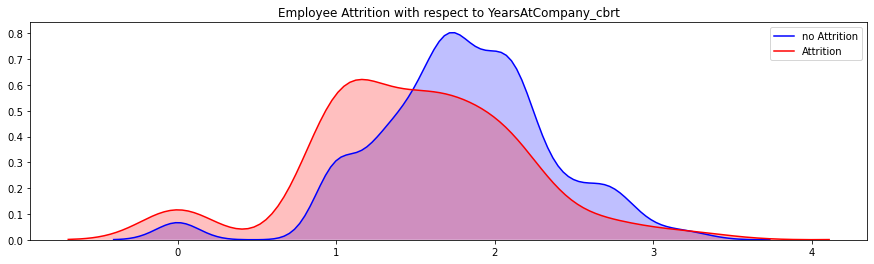

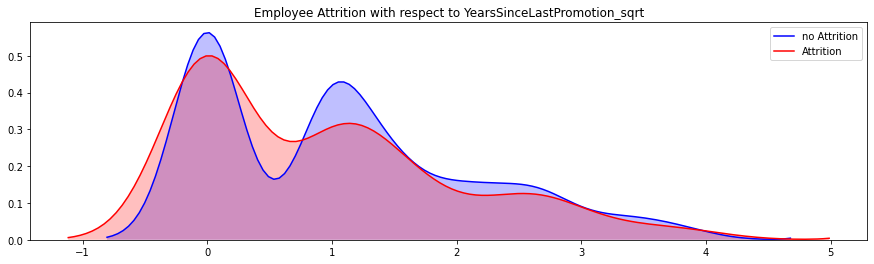

In [25]:
#Plotting KDE plots
for n in numeric_cols_kdeplot:
    kdePlot(n)

Insights:--

1) Attrition is high at job level 1.

2) Employees whose Monthly Income below 5000, have high Attrition.

3) Employees who worked in a company foe 0 to 1 years(new hires/freshers) , have high Attrition

4) Employess who are in current role for about 0 to 4 hours , have high rate of Attrition

# BAR PLOTS 

In [26]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']

In [27]:
#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

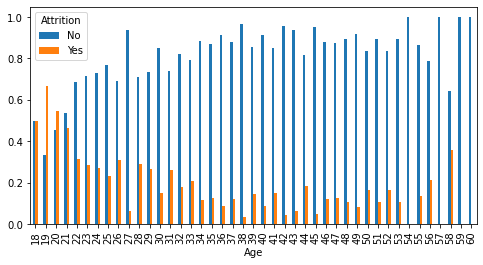

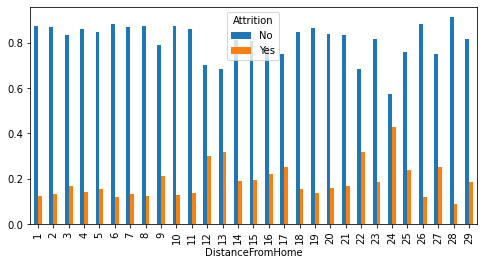

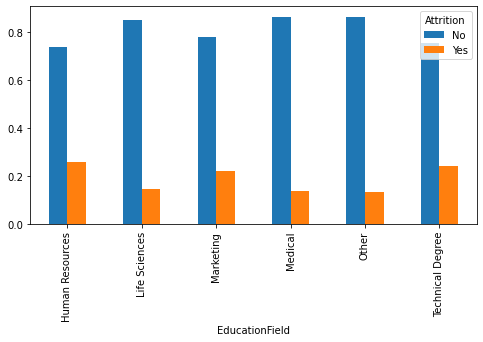

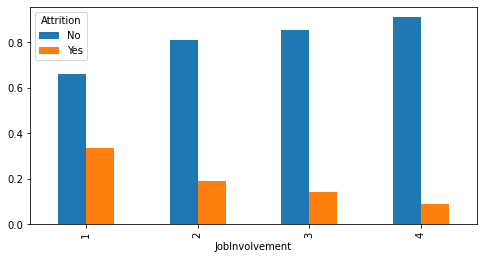

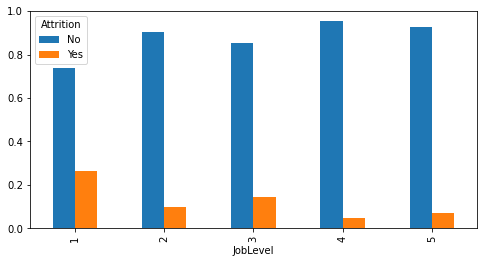

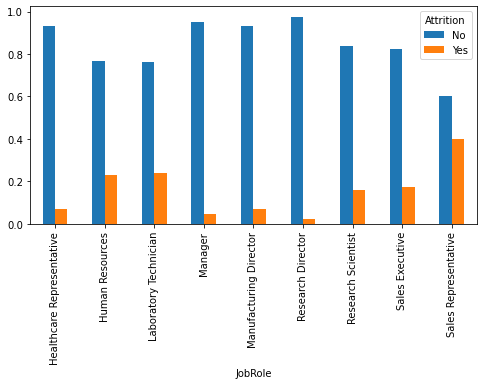

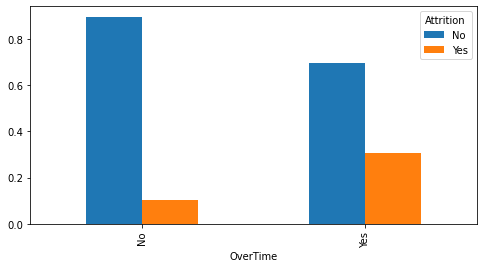

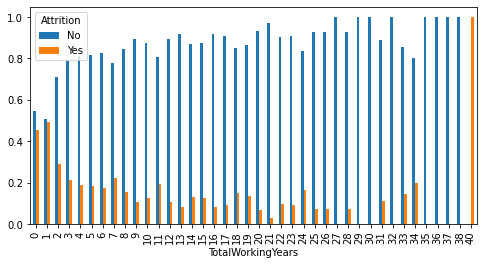

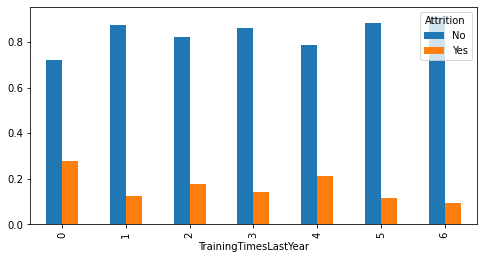

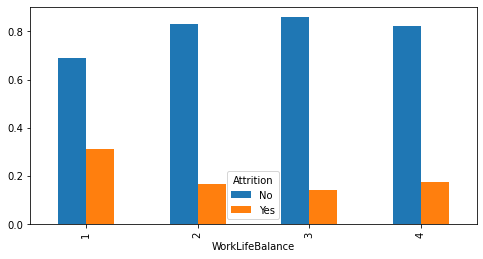

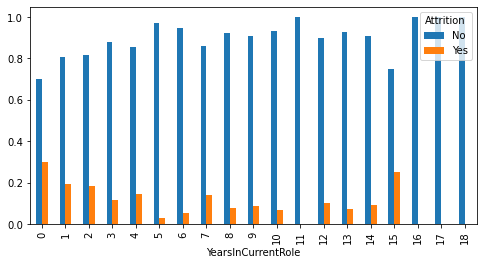

In [28]:
for col in BarPlot_columns:
    Bar_plots(col)

Insights:---

1)Attrition is very high with employees having age in between 18 to 22.

This might be due to students who are doing intership or small contract jobs or on bench.

2)Attrition is more when the distance of office is more from home.

3)Attrition is high with employee's education in the field of Human Resources,

Marketing and Technical Degree to other fields.

4)Attrition is high with employee's whose job role is in the field of Human Resources,

Sales Representative, Sales Excecutive, Laboratory Technician.

5)Employees who work over time have high attrition than employees who did not do over time

6)Employees who are working less than 2 years have more attrition

## Outlier Detection and Treatment 

In [29]:
import numpy as np
from scipy import stats

In [30]:
z = np.abs(stats.zscore(df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
 'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
 'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
 'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
 'YearsWithCurrManager']]))

print(z)

#Looking the code and the output above, it is difficult to say which data point is an outlier.
#Let’s try and define a threshold to identify an outlier.

threshold = 3
print(np.where(z > 3))

[[0.4463504  0.74252653 1.01090934 ... 0.0632959  0.67914568 0.24583399]
 [1.32236521 1.2977746  0.14714972 ... 0.76499762 0.36871529 0.80654148]
 [0.008343   1.41436324 0.88751511 ... 1.16768726 0.67914568 1.15593471]
 ...
 [1.08667552 1.60518328 0.64072665 ... 0.61549158 0.67914568 0.31487349]
 [1.32236521 0.54667746 0.88751511 ... 0.48889978 0.67914568 1.08689522]
 [0.32016256 0.43256792 0.14714972 ... 0.33939374 0.36871529 0.59522723]]
(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1

In [31]:
print(z[28][22])

3.6100788863016295


# Removal of Outliers

In [32]:
df_out = df[(z < 3).all(axis=1)]    

In [33]:
df_out1=df_out.drop(["DistanceFromHome_sqrt","DistanceFromHome_log","DistanceFromHome_cbrt","MonthlyIncome_sqrt",
                    "MonthlyIncome_log","MonthlyIncome_cbrt","PercentSalaryHike_sqrt","PercentSalaryHike_log",
                    "PercentSalaryHike_cbrt","YearsAtCompany_sqrt","YearsSinceLastPromotion_sqrt","YearsAtCompany_cbrt",
],axis=1)#inplace=True)

In [34]:
df_out1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [35]:
df_out1.shape

(1387, 35)

# Dividing final dataset into categorical and continuous variables

In [36]:
numerical_df=df_out1.select_dtypes(include=np.number)
categorical_df=df_out1.select_dtypes(exclude=np.number)
numeric_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)

# Converting categorical variables to binary

In [37]:
categorical_df_dummies=pd.get_dummies(df_out1[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)
final_df.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [38]:
final_df.shape

(1387, 48)

In [39]:
final_df.drop(["StandardHours","EmployeeNumber","EmployeeCount"],axis=1,inplace=True)
# removed those columns as those are of no use and two of them have constant values

In [40]:
final_df

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


# Creating model:
    
## 1) Random Forest    

This model is created firstly with all the features

In [41]:
X=final_df[["BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely","Department_Research & Development",
            "Department_Sales","EducationField_Life Sciences","EducationField_Marketing","EducationField_Medical",
            "EducationField_Other","EducationField_Technical Degree","Gender_Male","JobRole_Human Resources",
            "JobRole_Laboratory Technician","JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director",
            "JobRole_Research Scientist","JobRole_Sales Executive","JobRole_Sales Representative",
            "MaritalStatus_Married","MaritalStatus_Single","OverTime_Yes","Age","DailyRate",
            "DistanceFromHome","Education","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel",
            "JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike",
            "PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears",
            "TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
            "YearsSinceLastPromotion","YearsWithCurrManager"]]

Y=final_df[["Attrition_Yes"]]


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=30)


from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_depth=4)
model_rfc=rfc.fit(xtrain,ytrain)
pred_rfc=model_rfc.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest['Attrition_Yes'],pred_rfc))
print(accuracy_score(ytest['Attrition_Yes'],pred_rfc))

[[361   2]
 [ 50   4]]
0.8752997601918465


In [42]:
model_rfc.feature_importances_

array([0.01383061, 0.00466027, 0.00282064, 0.01469526, 0.00147803,
       0.02223341, 0.00626222, 0.        , 0.00311474, 0.        ,
       0.        , 0.        , 0.        , 0.00432588, 0.00045359,
       0.        , 0.00286541, 0.00847568, 0.01984443, 0.08725577,
       0.08472596, 0.07375861, 0.02305432, 0.01976503, 0.01796669,
       0.02980515, 0.02556739, 0.04366764, 0.07735856, 0.01834292,
       0.04417343, 0.01636642, 0.01336905, 0.00065544, 0.0049875 ,
       0.00877484, 0.05889358, 0.09697291, 0.00829208, 0.03691711,
       0.01602943, 0.01506607, 0.01998208, 0.05319185])

<BarContainer object of 44 artists>

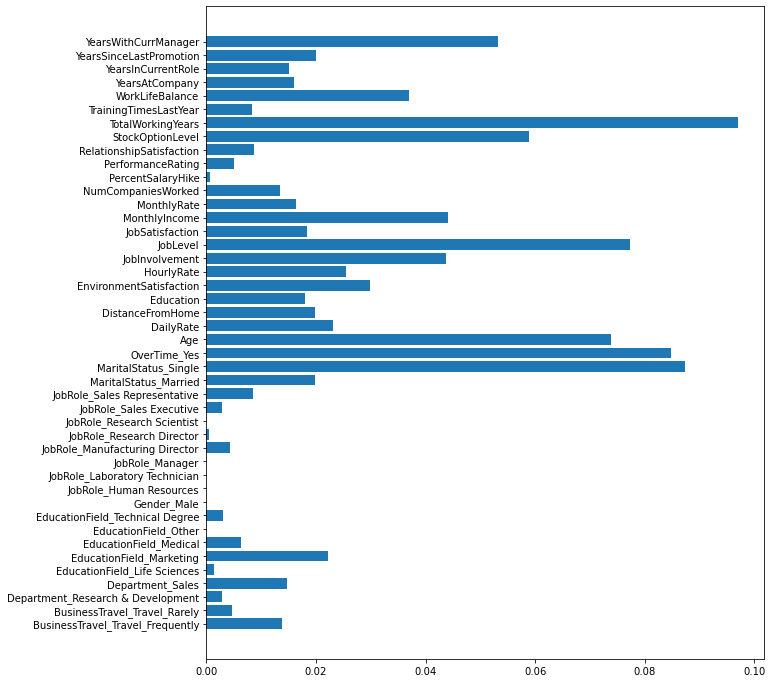

In [43]:
import matplotlib.pyplot as plt
f , ax = plt.subplots(figsize=(10,12))
plt.barh(X.columns,model_rfc.feature_importances_)

On the basis of these important features, again model is created with only imp features.

In [44]:
X=final_df[["MonthlyIncome","TotalWorkingYears","MaritalStatus_Single",
            "JobSatisfaction","EnvironmentSatisfaction","Age","OverTime_Yes","DistanceFromHome"]]#,
            #"StockOptionLevel",,"YearsAtCompany","NumCompaniesWorked","EducationField_Technical Degree","Department_Research & Development"]]


Y=final_df[["Attrition_Yes"]]


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)


from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_depth=4)
model_rfc=rfc.fit(xtrain,ytrain)
pred_rfc=model_rfc.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest['Attrition_Yes'],pred_rfc))
print(accuracy_score(ytest['Attrition_Yes'],pred_rfc))

[[237   2]
 [ 33   6]]
0.8741007194244604


Not a much difference in the accuracy but misclassifications are less. So the prediction will be more accurate.

# 2) Logistic Regression

In [45]:
X=final_df[["TotalWorkingYears","StockOptionLevel","MonthlyIncome","JobSatisfaction","OverTime_Yes","Age",
            "MaritalStatus_Single","BusinessTravel_Travel_Frequently","JobRole_Sales Representative","JobInvolvement",
           "DistanceFromHome"]]

Y=final_df[["Attrition_Yes"]]


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(xtrain,ytrain)
pred_lr=model_lr.predict(xtest)


In [46]:
ytest["predicted"]=pred_lr

In [47]:
ytest.head()

,Attrition_Yes,predicted
944,0,0
1288,0,0
1167,1,0
1062,0,0
620,0,1


In [48]:
xtest.shape

(278, 11)

In [49]:
ytest.shape

(278, 2)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(ytest['Attrition_Yes'],pred_lr))
print(confusion_matrix(ytest['Attrition_Yes'],pred_lr))

0.8597122302158273
[[233   6]
 [ 33   6]]


In [51]:
pred_lr=model_lr.predict_proba(xtest)
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc
fpr,tpr,threshold=roc_curve(ytest['Attrition_Yes'],pred_lr[:,1])
roc_auc=auc(fpr,tpr)

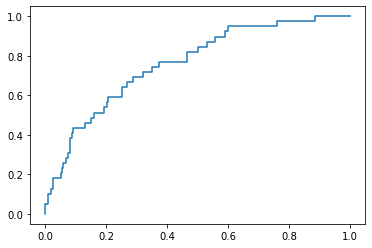

In [52]:
import matplotlib.pyplot as plt   #fpr= false positive rate , tpr-true positive rate
plt.plot(fpr,tpr,roc_auc)
plt.show()

# 3) Decision Tree

In [54]:
X=final_df[["MonthlyIncome","TotalWorkingYears","MaritalStatus_Single",
            "JobSatisfaction","EnvironmentSatisfaction","Age","OverTime_Yes","DistanceFromHome"]]


Y=final_df[["Attrition_Yes"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=30)

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=4)
model_dtc=dtc.fit(xtrain,ytrain)
pred_dtc=model_dtc.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest['Attrition_Yes'],pred_dtc))
print(accuracy_score(ytest['Attrition_Yes'],pred_dtc))

[[330  33]
 [ 33  21]]
0.841726618705036


# 4) Adaboost

In [55]:
X=final_df[["MonthlyIncome","TotalWorkingYears","MaritalStatus_Single",
            "JobSatisfaction","EnvironmentSatisfaction","Age","OverTime_Yes","DistanceFromHome"]]

Y=final_df[["Attrition_Yes"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=30)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=10)
model_abc=abc.fit(xtrain,ytrain)
pred_abc=model_abc.predict(xtest)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(ytest['Attrition_Yes'],pred_abc))
print(accuracy_score(ytest['Attrition_Yes'],pred_abc))

[[338  25]
 [ 33  21]]
0.8609112709832134


# To balance the dataset, Over sampling is performed

In [56]:
import imblearn

In [57]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, Y_smote = smote.fit_resample(X, Y)

#print('Original dataset shape', Counter(y))
#print('Resample dataset shape', Counter(y_ros))

In [58]:
X_smote.shape

(2316, 8)

In [59]:
Y_smote.shape

(2316, 1)

# checking for random forest model

In [60]:
X=final_df[["MonthlyIncome","TotalWorkingYears","MaritalStatus_Single",
            "JobSatisfaction","EnvironmentSatisfaction","Age","OverTime_Yes","DistanceFromHome"]]#,
            #"StockOptionLevel",,"YearsAtCompany","NumCompaniesWorked","EducationField_Technical Degree","Department_Research & Development"]]


Y=final_df[["Attrition_Yes"]]


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)


from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_depth=4)
model_rfc1=rfc.fit(xtrain,ytrain)
pred_rfc1=model_rfc1.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest['Attrition_Yes'],pred_rfc1))
print(accuracy_score(ytest['Attrition_Yes'],pred_rfc1))

[[237   2]
 [ 31   8]]
0.8812949640287769


# Checking for logistic model

In [61]:
X=final_df[["TotalWorkingYears","StockOptionLevel","MonthlyIncome","JobSatisfaction","OverTime_Yes","Age",
            "MaritalStatus_Single","BusinessTravel_Travel_Frequently","JobRole_Sales Representative","JobInvolvement",
           "DistanceFromHome"]]

Y=final_df[["Attrition_Yes"]]


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr1=lr.fit(xtrain,ytrain)
pred_lr1=model_lr1.predict(xtest)


In [62]:
ytest["predicted"]=pred_lr1

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(ytest['Attrition_Yes'],pred_lr1))
print(confusion_matrix(ytest['Attrition_Yes'],pred_lr1))

0.8597122302158273
[[233   6]
 [ 33   6]]


In [64]:
pred_lr1=model_lr1.predict_proba(xtest)
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc
fpr,tpr,threshold=roc_curve(ytest['Attrition_Yes'],pred_lr1[:,1])
roc_auc=auc(fpr,tpr)

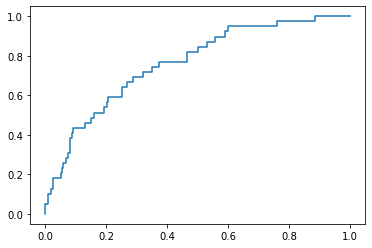

In [65]:
import matplotlib.pyplot as plt   #fpr= false positive rate , tpr-true positive rate
plt.plot(fpr,tpr,roc_auc)
plt.show()

# Under sampling 

In [66]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, Y_rus = rus.fit_resample(X, Y)

#print('original dataset shape:', Counter(Y))
#print('Resample dataset shape', Counter(Y_rus))



In [67]:
X_rus.shape

(458, 11)

In [68]:
Y_rus.shape

(458, 1)

# Random forest

In [69]:
X=final_df[["MonthlyIncome","TotalWorkingYears","MaritalStatus_Single",
            "JobSatisfaction","EnvironmentSatisfaction","Age","OverTime_Yes","DistanceFromHome"]]#,
            #"StockOptionLevel",,"YearsAtCompany","NumCompaniesWorked","EducationField_Technical Degree","Department_Research & Development"]]


Y=final_df[["Attrition_Yes"]]


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)


from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_depth=4)
model_rfc2=rfc.fit(xtrain,ytrain)
pred_rfc2=model_rfc2.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest['Attrition_Yes'],pred_rfc2))
print(accuracy_score(ytest['Attrition_Yes'],pred_rfc2))

[[238   1]
 [ 32   7]]
0.8812949640287769


# Logistic regression

In [70]:
X=final_df[["TotalWorkingYears","StockOptionLevel","MonthlyIncome","JobSatisfaction","OverTime_Yes","Age",
            "MaritalStatus_Single","BusinessTravel_Travel_Frequently","JobRole_Sales Representative","JobInvolvement",
           "DistanceFromHome"]]

Y=final_df[["Attrition_Yes"]]


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr2=lr.fit(xtrain,ytrain)
pred_lr2=model_lr2.predict(xtest)


In [71]:
ytest["predicted"]=pred_lr2

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(ytest['Attrition_Yes'],pred_lr2))
print(confusion_matrix(ytest['Attrition_Yes'],pred_lr2))

0.8597122302158273
[[233   6]
 [ 33   6]]


In [73]:
pred_lr2=model_lr2.predict_proba(xtest)
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc
fpr,tpr,threshold=roc_curve(ytest['Attrition_Yes'],pred_lr2[:,1])
roc_auc=auc(fpr,tpr)

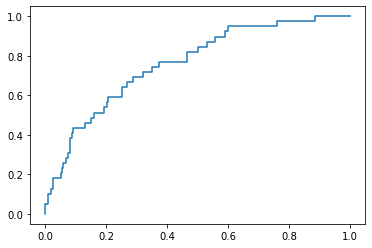

In [74]:
import matplotlib.pyplot as plt   #fpr= false positive rate , tpr-true positive rate
plt.plot(fpr,tpr,roc_auc)
plt.show()

In [ ]:
Thank You ....

In [75]:
df["MonthlyIncome"].iloc[5]

3068

In [76]:
"""
X=final_df[["BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely","Department_Research & Development",
            "Department_Sales","EducationField_Life Sciences","EducationField_Marketing","EducationField_Medical",
            "EducationField_Other","EducationField_Technical Degree","Gender_Male","JobRole_Human Resources",
            "JobRole_Laboratory Technician","JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director",
            "JobRole_Research Scientist","JobRole_Sales Executive","JobRole_Sales Representative",
            "MaritalStatus_Married","MaritalStatus_Single","OverTime_Yes","Age","DailyRate",
            "DistanceFromHome","Education","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel",
            "JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike",
            "PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears",
            "TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
            "YearsSinceLastPromotion","YearsWithCurrManager"]]
"""



'\nX=final_df[["BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely","Department_Research & Development",\n            "Department_Sales","EducationField_Life Sciences","EducationField_Marketing","EducationField_Medical",\n            "EducationField_Other","EducationField_Technical Degree","Gender_Male","JobRole_Human Resources",\n            "JobRole_Laboratory Technician","JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director",\n            "JobRole_Research Scientist","JobRole_Sales Executive","JobRole_Sales Representative",\n            "MaritalStatus_Married","MaritalStatus_Single","OverTime_Yes","Age","DailyRate",\n            "DistanceFromHome","Education","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel",\n            "JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike",\n            "PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears",\n            "Trainin

In [ ]:
Problem Definition:
Find the Attrition rate In IBM and factors responsible for this attrition.